# FEC Dataset

Download data from [https://berkeley-politics-capstone.s3.amazonaws.com/fec.zip](https://berkeley-politics-capstone.s3.amazonaws.com/fec.zip) and place in `"../data/"`

In [51]:
import os
import sys
import json
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
fec_2020_paths = {}
base_path = os.path.join("..","data","fec","2020")
for party_dir in os.listdir(base_path):
    if(party_dir[0]!="."):
        fec_2020_paths[party_dir] = {}
        for cand_dir in os.listdir(os.path.join(base_path,party_dir)):
            if(cand_dir[0]!="."):
                fec_2020_paths[party_dir][cand_dir] = {}
                for csv_path in os.listdir(os.path.join(base_path,party_dir,cand_dir)):
                    if(csv_path.find("schedule_a")>=0):
                        fec_2020_paths[party_dir][cand_dir]["donations"] = \
                            os.path.join(base_path,party_dir,cand_dir,csv_path)
                    elif(csv_path.find("schedule_b")>=0):
                        fec_2020_paths[party_dir][cand_dir]["spending"] = \
                            os.path.join(base_path,party_dir,cand_dir,csv_path)
print(json.dumps(fec_2020_paths, indent=4))

{
    "republican": {
        "trump": {
            "spending": "../data/fec/2020/republican/trump/schedule_b-2019-05-30T16_03_37.csv",
            "donations": "../data/fec/2020/republican/trump/schedule_a-2019-05-30T16_03_37.csv"
        }
    },
    "democrat": {
        "harris": {
            "spending": "../data/fec/2020/democrat/harris/schedule_b-2019-05-30T17_22_09.csv",
            "donations": "../data/fec/2020/democrat/harris/schedule_a-2019-05-30T17_19_58.csv"
        },
        "buttigieg": {
            "donations": "../data/fec/2020/democrat/buttigieg/schedule_a-2019-05-30T17_32_11.csv",
            "spending": "../data/fec/2020/democrat/buttigieg/schedule_b-2019-05-30T17_32_14.csv"
        },
        "klobuchar": {
            "spending": "../data/fec/2020/democrat/klobuchar/schedule_b-2019-05-30T17_28_05.csv",
            "donations": "../data/fec/2020/democrat/klobuchar/schedule_a-2019-05-30T17_26_34.csv"
        },
        "yang": {
            "donations": "../data

harris: 90
buttigieg: 66
klobuchar: 18
yang: 81
gillibrand: 81
delaney: 79
inslee: 41
orourke: 86
warren: 90
sanders: 41
gabbard: 70
booker: 90


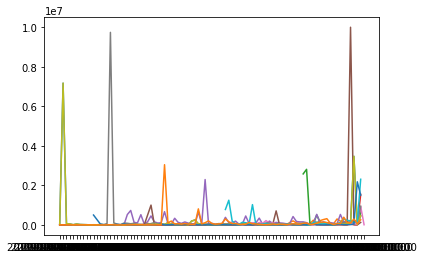

In [53]:
fig, ax = plt.subplots()
for candid in fec_2020_paths["democrat"].keys():
    if("donations" in fec_2020_paths["democrat"][candid].keys()):
        df = pd.read_csv(fec_2020_paths["democrat"][candid]["donations"])
        ts = df.groupby(by="contribution_receipt_date")["contribution_receipt_amount"].sum()
        print("{:s}: {:d}".format(candid, len(ts)))
        plt.plot(ts)
plt.show()